# Model Building

In [29]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score

import warnings
warnings.filterwarnings('ignore')

/Users/sudippandey/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sudippandey/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sudippandey/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sudippandey/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sudippandey/.local

In [3]:
#loading data 
income_df = pd.read_csv(Path('Resources/clean_data.csv', index_col=False))
income_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# create feature matrix (X)
#selecting all columns except 'income'
X=income_df.drop('income', axis=1) 

# create response vector (y)
##selecting 'income'
y=income_df['income'].values 

In [5]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [6]:
# One-hot encoding the 'workclass' column creates 9 new columns, one for each category
pd.get_dummies(X['workclass'])

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0
32557,0,0,0,0,1,0,0,0,0
32558,0,0,0,0,1,0,0,0,0
32559,0,0,0,0,1,0,0,0,0


## Converting categorical to numeric

In [7]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=108)


,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([0, 0, 0, ..., 0, 0, 1])

In [9]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

## Scaling using standard scalar

In [10]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.90894294,  0.88870638, -0.42454163, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.19050856, -0.66000898,  1.12727615, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.63028916, -0.24294561,  1.90318504, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       ...,
       [-0.85017946, -0.80615511,  1.12727615, ..., -2.93434654,
        -0.04483956, -0.022173  ],
       [ 1.49531708,  0.74245653, -0.42454163, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.41039886, -1.23397672,  1.12727615, ...,  0.34079138,
        -0.04483956, -0.022173  ]])

In [11]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.71520738, -1.53731954, -2.36431386, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-1.50985037,  0.17110055, -1.20045052, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.996773  , -0.82483353,  1.12727615, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       ...,
       [-0.7768827 , -0.77995253, -0.81249608, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [ 0.46916234, -0.03284403, -0.42454163, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-1.4365536 ,  1.215046  , -0.03658719, ...,  0.34079138,
        -0.04483956, -0.022173  ]])

## Model score function using train data only

In [12]:
#defining function for model scoring with training set only
def train_score(model, X_train_scaled=X_train_scaled,X_test_scaled=X_test_scaled, y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print("****************Train Score******************")
    print(train_score)
    print()
    
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=3, scoring='accuracy' )
    print("**********Using K=3 cross validation**********")
    print(cvs)
    print()
    
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print("************Confusion Matrix using cross_val_predict******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print("********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_train_predc=cross_val_predict(model,X_train_scaled, y_train,cv=3, method="predict_proba")
    y_proba = y_train_predc[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_train, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("************Area under the curve******************")
    print(roc_auc)

## Model score function using both train and test data 

In [13]:
#defining function for model scoring with test set
def test_score(model, X_train_scaled=X_train_scaled,X_test_scaled=X_test_scaled, y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print("****************Train Score******************")
    print(train_score)
    print()

    print("*****************Test Score******************")
    print(test_score)
    print()
    
    #predection on the test set and confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print("************Confusion Matrix******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_test, y_pred)
    print("********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("************Area under the curve******************")
    print(roc_auc)
    


## Stochastic Gradent Descent Classifier

In [ ]:
# Creating a sgd classifier model on the scaled data
sgd_clf=SGDClassifier(random_state=42, loss='log')

# Fit the model to the data
sgd_clf.fit(X_train_scaled, y_train)

In [ ]:
#score for logistic regression using only training data
train_score(sgd_clf)

In [ ]:
#score for sgd classifier using  training and test data
test_score(sgd_clf)

## Logistic Regression

In [14]:
# Creating a Logistic Regression model on the scaled data
lr= LogisticRegression()

# Fit the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

****************Train Score******************
0.8526208026208026

**********Using K=3 cross validation**********
[0.8522113  0.85159705 0.84643735]

************Confusion Matrix using cross_val_predict******************
[[17124  1293]
 [ 2368  3635]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     18417
           1       0.74      0.61      0.67      6003

    accuracy                           0.85     24420
   macro avg       0.81      0.77      0.78     24420
weighted avg       0.84      0.85      0.84     24420


ROC Curve


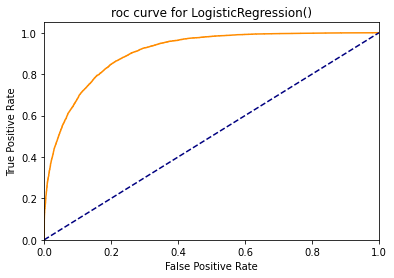


************Area under the curve******************
0.9061417690278858


In [15]:
#score for logistic regression using only training data
train_score(lr)

****************Train Score******************
0.8526208026208026

*****************Test Score******************
0.8555460017196904

************Confusion Matrix******************
[[5830  473]
 [ 703 1135]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6303
           1       0.71      0.62      0.66      1838

    accuracy                           0.86      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.85      0.86      0.85      8141


ROC Curve


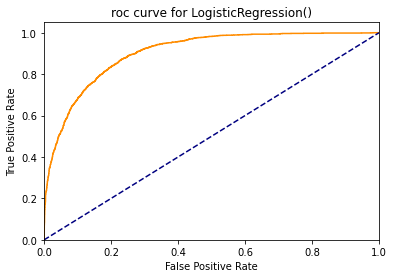


************Area under the curve******************
0.9033739913822406


In [16]:
#score for logistic regression using training and test data
test_score(lr)

### Tuning hyperparamaters  using Grid Search CV

In [23]:
#### Using GridSearchCV
param_grid_lr = {'C': [0.01,0.1,1, 5, 10],
              'penalty': ['l1','l2'],
             'solver':['lbfgs','saga'],
                'max_iter':[100,500,1000]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, verbose=1, n_jobs=-1)

In [24]:
grid_lr.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga']},
             verbose=1)

In [25]:
# List the best parameters for this dataset
print(grid_lr.best_params_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [26]:
# List the best score
print(grid_lr.best_score_)

0.8507780507780508


In [27]:
#best estimator
lr_b=grid_lr.best_estimator_
lr_b

LogisticRegression(C=0.1, solver='saga')

****************Train Score******************
0.8533169533169533

*****************Test Score******************
0.8561601768824468

************Confusion Matrix******************
[[5833  470]
 [ 701 1137]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6303
           1       0.71      0.62      0.66      1838

    accuracy                           0.86      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.85      0.86      0.85      8141


ROC Curve


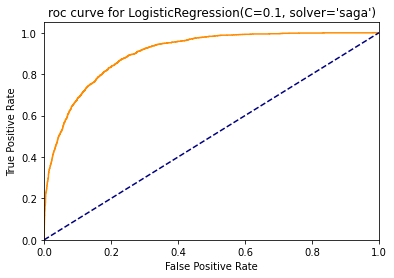


************Area under the curve******************
0.9038100757588705


In [30]:
#score for logistic regression using training and test data
test_score(lr_b)

### Tuning hyperparamaters  using Randomized Search CV

In [31]:
#### Using GridSearchCV
param_rand_lr = {'C': [0.01,0.1,1, 5, 10],
              'penalty': ['l1','l2'],
             'solver':['lbfgs','saga'],
                'max_iter':[100,500,1000]}
rand_lr = RandomizedSearchCV(lr, param_rand_lr, cv=3, verbose=1, n_jobs=-1)

In [ ]:
rand_lr.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# List the best parameters for this dataset
print(rand_lr.best_params_)

In [ ]:
# List the best score
print(grid_lr.best_score_)

In [ ]:
#best estimator
lr_R_b=rand_lr.best_estimator_
lr_R_b

In [ ]:
#score for logistic regression using training and test data
test_score(lr_R_b)

## KNeighbors Classifier

In [ ]:
# Creating a Kneighbors classifier model on the scaled data
knn= KNeighborsClassifier(n_neighbors=3)

# Fit the model to the data
knn.fit(X_train_scaled, y_train)

In [ ]:
#score for Kneighbors classifier using only training data
train_score(knn)

In [ ]:
#score for Kneighbors classifier using training and test data
test_score(knn)

In [ ]:
# Loop through different k values to find which has the highest accuracy.
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    tra_score = knn.score(X_train_scaled, y_train)
    tes_score = knn.score(X_test_scaled, y_test)
    train_scores.append(tra_score)
    test_scores.append(tes_score)
    print(f"k: {k}, Train/Test Score: {tra_score:.3f}/{tes_score:.3f}")
    
#plotting knn scores
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Creating a Kneighbors classifier model on the scaled data
knn_5= KNeighborsClassifier(n_neighbors=5)

# Fit the model to the data
knn_5.fit(X_train_scaled, y_train)

In [ ]:
#score for Kneighbors classifier using training and test data
test_score(knn_5)

## Support Vector Classifier

In [ ]:
# Creating a support vector classifier model on the scaled data
svc= SVC(kernel='linear',  probability=True)

# Fit the model to the data
svc.fit(X_train_scaled, y_train)

In [ ]:
#score for support vector classifier using only training data
#train_score(svc)

In [ ]:
#score for support vector classifier using training and test data
test_score(svc)

### Tuning hyperparamaters  using Grid Search CV

### Tuning hyperparamaters  using Randomized Search CV

## Decision Tree

In [ ]:
# Creating a Decision Tree model on the scaled data
dt= DecisionTreeClassifier()

# Fit the model to the data
dt.fit(X_train_scaled, y_train)

In [ ]:
#score for Decision Tree using only training data
train_score(dt)

In [ ]:
#score for Decision Tree using training and test data
test_score(dt)

In [ ]:
# plotting columns with its importances
features_dt = dt.feature_importances_
print(features_dt)
plt.bar(x = range(len(features_dt)), height=features_dt)
plt.show()

### Tuning hyperparamaters  using Grid Search CV

### Tuning hyperparamaters  using Randomized Search CV

## Bagging

## a. Random Forest Classifier
Instead of having one decision tree, we make more random trees and average their output.

In [ ]:
# Creating a Random Forest Classifer model on the scaled data
rf= RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train_scaled, y_train)

In [ ]:
#score for Random Forest Classifer using only training data
train_score(rf)

In [ ]:
#score for Random Forest Classifer using training and test data
test_score(rf)

In [ ]:
# plotting columns with its importances
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

### Tuning hyperparamaters  using Grid Search CV

### Tuning hyperparamaters  using Randomized Search CV

## b. Extremely Random Trees
Changing the behavior of the decision trees so that they randomly choose their splits

In [ ]:
# Creating a Extremely Random Trees model on the scaled data
rt= ExtraTreesClassifier()

# Fit the model to the data
rt.fit(X_train_scaled, y_train)

In [ ]:
#score for Extremely Random Trees using only training data
train_score(rt)

In [ ]:
#score for Extremely Random Trees using training and test data
test_score(rt)

In [ ]:
# plotting columns with its importances
features_rt = rt.feature_importances_
print(features_rt)
plt.bar(x = range(len(features_rt)), height=features_rt)
plt.show()

### Tuning hyperparamaters  using Grid Search CV

### Tuning hyperparamaters  using Randomized Search CV

## Boosting
In Bosting each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [ ]:
# Creating a Logistic Regression model on the scaled data
ab= AdaBoostClassifier()

# Fit the model to the data
ab.fit(X_train_scaled, y_train)

In [ ]:
#score for logistic regression using only training data
train_score(ab)

In [ ]:
#score for logistic regression using training and test data
test_score(ab)

In [ ]:
# plotting columns with its importances
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

### Tuning hyperparamaters  using Grid Search CV

### Tuning hyperparamaters  using Randomized Search CV

## Trying to improve score by selecting important features based on Adaboster Classifier


In [ ]:
sel = SelectFromModel(ab)
sel.fit(X_train_scaled, y_train)

In [ ]:
sel.get_support()

In [ ]:
X_train_sel, X_test_sel, y_train, y_test=train_test_split(sel.transform(X_dummies), y_label, random_state=1)

scaler1 = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler1.transform(X_train_sel)
X_selected_test_scaled = scaler1.transform(X_test_sel)


### SGD Classifier after selecting important features

In [ ]:
#before model selection
print(f'Training Score: {sgd_clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {sgd_clf.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
sgd_s = SGDClassifier(random_state=42, loss='log').fit(X_selected_train_scaled, y_train)
print(f'Training Score: {sgd_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {sgd_s.score(X_selected_test_scaled, y_test)}')

### Logistic Regression after selecting important features

In [ ]:
#before model selection
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
lr_s = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {lr_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_s.score(X_selected_test_scaled, y_test)}')

### KNeighborsClassifier after selecting important features

In [ ]:
#before model selection
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
knn_s=KNeighborsClassifier(n_neighbors=3).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {knn_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {knn_s.score(X_selected_test_scaled, y_test)}')

### SVC after selecting important features

In [ ]:
#before model selection
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
# Support vector machine linear classifier
svc_s=SVC(kernel='linear').fit(X_selected_train_scaled, y_train)
print(f'Training Score: {svc_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {svc_s.score(X_selected_test_scaled, y_test)}')

### Decision Tree after selecting important features

In [ ]:
#before model selection
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
dt_s = DecisionTreeClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {dt_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {dt_s.score(X_selected_test_scaled, y_test)}')

### Random Forest after selecting important features

In [ ]:
#before model selection
print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
rf_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rf_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf_s.score(X_selected_test_scaled, y_test)}')

### Ada Booster classifier after selecting important features

In [ ]:
#before model selection
print(f'Training Score: {ab.score(X_train_scaled, y_train)}')
print(f'Testing Score: {ab.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
ab_s = AdaBoostClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {ab_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {ab_s.score(X_selected_test_scaled, y_test)}')